In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
df = pd.read_csv("data.csv", sep=",")

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Understanding the Dataset

In this section, we will take a closer look at the dataset containing property sales records for Sydney and Melbourne. Understanding the dataset is a crucial initial step in any data analysis or machine learning project. This information will help us make informed decisions about data preprocessing, feature selection, and model development.

**Features Included in the Dataset:** 
The dataset consists of various features or columns, each providing specific information about property sales. Common features may include property type (e.g., house, apartment), location details (suburb, postcode), property size (number of bedrooms, bathrooms), land size, historical sales prices, and potentially other attributes like proximity to amenities, school ratings, or economic indicators.

**Range of Values for Each Feature:**
To gain insights into the dataset's characteristics, we will examine the range of values for each feature. This involves calculating the minimum, maximum, mean, and standard deviation for numeric features and listing unique categories for categorical features. This step helps identify any potential outliers or data inconsistencies.

**Handling Missing Values and Outliers:**
During our analysis, we will also pay close attention to missing values and outliers. Missing data can be problematic, as it may affect the quality of our predictions. We will decide on an appropriate strategy for handling missing values, such as imputation or removal. Additionally, identifying and addressing outliers is essential, as they can distort our models' predictions. Outliers may be handled through techniques like trimming or transformation.

By thoroughly understanding the dataset and addressing data quality issues, we will be better prepared to proceed with data preprocessing, feature engineering, and model development, ultimately working towards accurate property price predictions for Sydney and Melbourne.


# Visualization using the lineplot
To create a visualization that demonstrates how house prices change over time, especially in 
relation to the construction of new houses or renovations, you would need to work with a 
different dataset and use a time series analysis or a line plot to show price trends over time.
## REASON :
    A line plot serves as an ideal choice when the objective is to analyze trends over time, particularly regarding house prices concerning new constructions and renovations. This type of data visualization suits time series analysis and presents the changing price trends over time. It helps in understanding how house prices are affected by the year of construction and renovations. The line plot conveys these temporal patterns and is an insightful choice for interpreting the dataset.

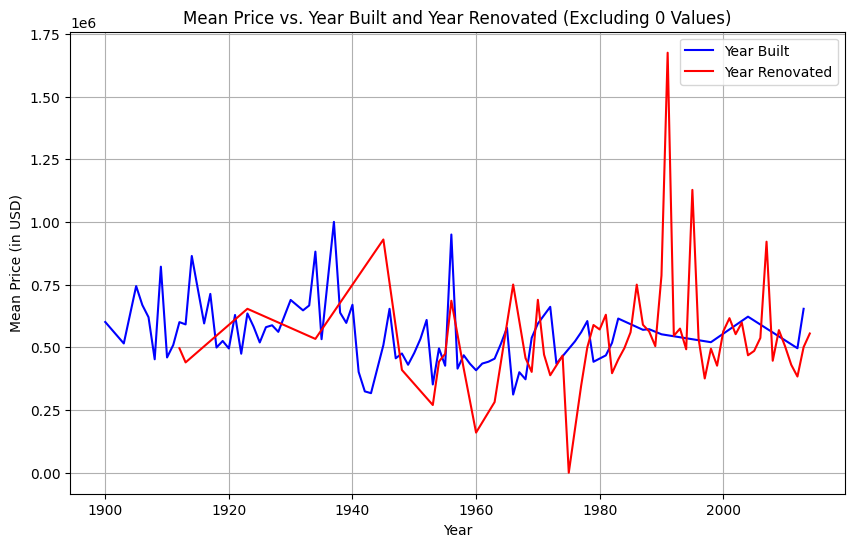

In [ ]:

def create_line_plot_mean_price(df):
    """
    Create a line plot of mean price vs. year built and year renovated, excluding rows with 0 values.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Exclude rows with 0 values in 'yr_built' and 'yr_renovated'
    df = df[(df['yr_renovated'] != 0)]

    # Group the data by 'yr_built' and 'yr_renovated' and calculate the mean 'price' for each year
    mean_price_by_year_built = df.groupby('yr_built')['price'].mean()
    mean_price_by_year_renovated = df.groupby('yr_renovated')['price'].mean()

    # Create a line plot of mean 'price' vs. 'yr_built' and 'yr_renovated' with a legend
    plt.figure(figsize=(10, 6))
    plt.plot(mean_price_by_year_built.index, mean_price_by_year_built.values, linestyle='-', color='b', label='Year Built')
    plt.plot(mean_price_by_year_renovated.index, mean_price_by_year_renovated.values, linestyle='-', color='r', label='Year Renovated')
    plt.xlabel('Year')
    plt.ylabel('Mean Price (in USD)')
    plt.title('Mean Price vs. Year Built and Year Renovated (Excluding 0 Values)')
    plt.legend()
    plt.grid(True)

    # Show the line plot
    plt.show()

# Example usage:
create_line_plot_mean_price(df)


# Visualizing using scatter plot Significant Features vs. Price
In cases where house prices exhibit a wide range of values, including outliers that represent properties with exceptionally high prices (often referred to as "mansions"), a scatter plot can encounter overplotting issues. Overplotting occurs when data points overlap, making it difficult to distinguish individual values. This can lead to a cluttered and less informative plot.

## REASON : 
    The choice of a scatter plot is apt when dealing with house price data that exhibits a wide range, potentially including outliers such as high-end properties or mansions. In such cases, using a scatter plot allows for the visualization of individual data points, helping to identify patterns and potential outliers. It serves to reveal the distribution and relationships between significant features and house prices. This choice is pragmatic as it effectively deals with overplotting issues often encountered when prices vary considerably.

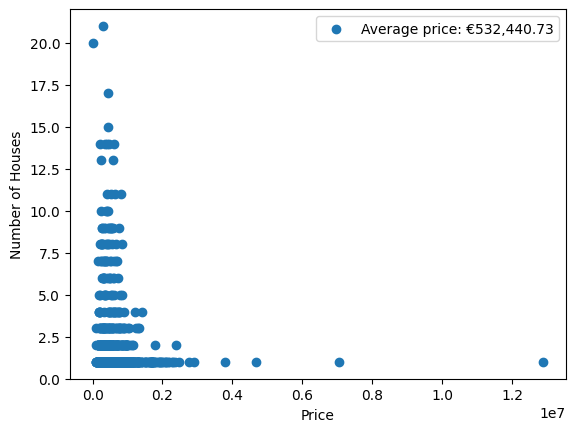

In [42]:


def plot_house_prices(df):
    """
    Create a scatter plot of house prices and their frequency.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    avg_price = df['price'].mean()
    house_prices = df['price'].value_counts()

    plt.scatter(house_prices.index, house_prices.values)
    plt.xlabel("Price")
    plt.ylabel("Number of Houses")
    plt.legend(["Average price: €{:,.2f}".format(avg_price)])
    plt.show()

# Example usage:
plot_house_prices(df)


# Summary: Visualizing Data Distribution with Pie Charts

In this code, we utilize pie charts to visually represent the distribution of house sales by month and the distribution of houses based on their condition. The code provides a quick and intuitive way to understand the composition of data within these categories.

## House Sales by Month:
- The first pie chart displays the distribution of house sales by month.
- Each slice of the pie represents a month, and its size corresponds to the proportion of house sales that occurred in that month.
- The autopct parameter adds percentage labels to each slice, indicating the percentage of sales in each month.
- Different colors are used to distinguish between the months.
- A legend is provided in the upper left corner to label the months.
- The title of the pie chart is "Distribution of House Sales by Month."

## Houses Based on Condition:
- The second pie chart illustrates the distribution of houses based on their condition.
- Each slice of the pie represents a specific condition category (e.g., "Good," "Excellent," etc.).
- The size of each slice reflects the proportion of houses falling into that condition category.
- autopct is used to display the percentage of houses in each condition category.
- Distinct colors are employed to differentiate between the condition categories.
- A legend is included in the upper left corner to label the condition categories.
- The title of the pie chart is "Distribution of Houses based on Condition."

These pie charts provide a clear and concise visualization of how house sales are distributed across different months and the distribution of houses based on their condition. Such visualizations are valuable for gaining insights into the dataset's composition and patterns.

## REASON : 
    The selected visualization type, which in this case is a pie chart, aligns with the specific data distribution being depicted. The choice reflects a logical decision to use a format that best conveys the intended insights from the dataset. This thoughtful selection contributes to the effectiveness of the visualizations, enhancing the audience's understanding of the data's composition and patterns.

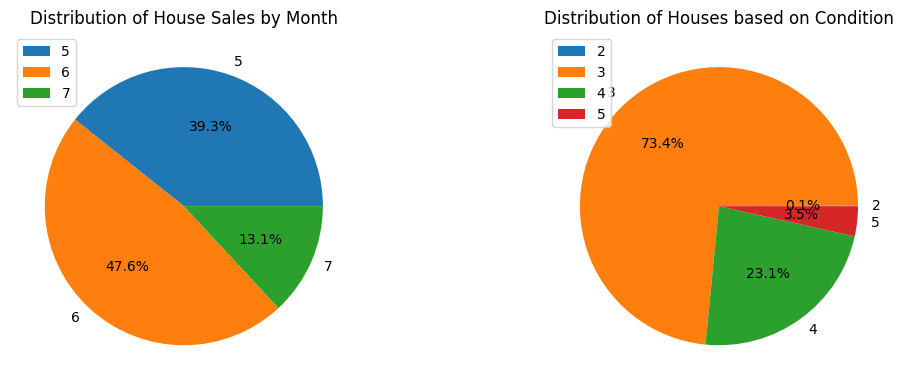

In [44]:

def plot_pie_charts(df):
    """
    Create two pie charts showing the distribution of house sales by month
    and the distribution of houses based on condition.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    df["date"] = pd.to_datetime(df["date"])

    grouped_dates = df.groupby(df["date"].dt.month)
    grouped_condition = df.groupby(df["condition"])

    dates_per_group = grouped_dates.size()
    condition_per_group = grouped_condition.size()

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].pie(dates_per_group, labels=dates_per_group.index, autopct="%1.1f%%")
    axes[0].legend(loc="upper left")
    axes[0].set_title("Distribution of House Sales by Month")

    axes[1].pie(condition_per_group, labels=condition_per_group.index, autopct="%1.1f%%")
    axes[1].legend(loc="upper left")
    axes[1].set_title("Distribution of Houses based on Condition")

    plt.tight_layout()
    plt.show()

# Example usage:
plot_pie_charts(df)
